#  Capstone Two: Preprocessing and Training Data Development

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
#from sklearn.preprocessing import StandardScaler

## 1. Sourcing and loading
### 1a. Load the data
The dataset contains information on Analyzing churn rate data alongside call center data can provide valuable insights into customer behavior, satisfaction levels, and potential areas for improvement within a telecom company. Combining churn rate data with call center data offers a comprehensive view of customer dynamics and can guide strategic decision-making aimed at reducing churn and improving overall customer satisfaction and retention. The data is presented as an Excel workbook containing two worksheets. Each worksheet contains a different dataset.

##  Load Data

In [2]:
df = pd.read_csv('Data/churn_rate_cleaned.csv')
df.head(50)

,gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,num AdminTickets,num TechTickets,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.50,0,0,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,0,0,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,...,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,0,0,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,...,No,No,Month-to-month,No,Mailed check,29.75,301.90,0,0,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,0,2,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,...,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0,0,No


In [3]:
# Call the info method on df to see a summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             7043 non-null   object 
 1   Senior Citizen     7043 non-null   int64  
 2   Partner            7043 non-null   object 
 3   Dependents         7043 non-null   object 
 4   tenure             7043 non-null   int64  
 5   Phone Service      7043 non-null   object 
 6   Multiple Lines     7043 non-null   object 
 7   Internet Service   7043 non-null   object 
 8   Online Security    7043 non-null   object 
 9   Online Backup      7043 non-null   object 
 10  Device Protection  7043 non-null   object 
 11  Tech Support       7043 non-null   object 
 12  Streaming TV       7043 non-null   object 
 13  Streaming Movies   7043 non-null   object 
 14  Contract           7043 non-null   object 
 15  Paperless Billing  7043 non-null   object 
 16  Payment Method     7043 

In [4]:
# Identifying which columns in your DataFrame have missing values
nan_count_per_column = df.isna().sum()

In [5]:
nan_count_per_column

gender                0
Senior Citizen        0
Partner               0
Dependents            0
tenure                0
Phone Service         0
Multiple Lines        0
Internet Service      0
Online Security       0
Online Backup         0
Device Protection     0
Tech Support          0
Streaming TV          0
Streaming Movies      0
Contract              0
Paperless Billing     0
Payment Method        0
Monthly Charges       0
Total Charges        11
num AdminTickets      0
num TechTickets       0
Churn                 0
dtype: int64

In [6]:
# Fill in missing values
df_filled = df.fillna(0)

In [7]:
df_filled.isna().sum()

gender               0
Senior Citizen       0
Partner              0
Dependents           0
tenure               0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
num AdminTickets     0
num TechTickets      0
Churn                0
dtype: int64

In [8]:
# Use pandas' Series method `value_counts` to find the count of Payment Method names
counts = df_filled['Payment Method'].value_counts()

In [9]:
counts

Payment Method
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

## Create dummy features for categorical variables

In [10]:
# create dummy variable of the 'Payment Method' colomn
Payment_Method = pd.get_dummies(df_filled, columns=['Payment Method'], prefix='C')

In [11]:
df_filled[Payment_Method.columns] = Payment_Method

In [12]:
#drop original 'Payment Method' colomn so that only dummy variables of the 'Payment Method' colomn remains
#df_drop=df_filled.drop('Payment Method', axis=1, inplace=True)

In [13]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       7043 non-null   object 
 1   Senior Citizen               7043 non-null   int64  
 2   Partner                      7043 non-null   object 
 3   Dependents                   7043 non-null   object 
 4   tenure                       7043 non-null   int64  
 5   Phone Service                7043 non-null   object 
 6   Multiple Lines               7043 non-null   object 
 7   Internet Service             7043 non-null   object 
 8   Online Security              7043 non-null   object 
 9   Online Backup                7043 non-null   object 
 10  Device Protection            7043 non-null   object 
 11  Tech Support                 7043 non-null   object 
 12  Streaming TV                 7043 non-null   object 
 13  Streaming Movies  

## Scale standardization

In [14]:
# import the preprocessing package from the sklearn library
from sklearn.preprocessing import StandardScaler

In [15]:
SS_scaler = StandardScaler()

In [16]:
SS_scaler.fit(df_filled[['tenure']])

StandardScaler()

In [17]:
df_filled['SS_tenure'] = SS_scaler.transform(df_filled[['tenure']])

In [18]:
df_filled.columns

Index(['gender', 'Senior Citizen', 'Partner', 'Dependents', 'tenure',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges',
       'num AdminTickets', 'num TechTickets', 'Churn',
       'C_Bank transfer (automatic)', 'C_Credit card (automatic)',
       'C_Electronic check', 'C_Mailed check', 'SS_tenure'],
      dtype='object')

In [19]:
print(df_filled[['SS_tenure','tenure']].head())

   SS_tenure  tenure
0  -1.277445       1
1   0.066327      34
2  -1.236724       2
3   0.514251      45
4  -1.236724       2


array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'SS_tenure'}>]], dtype=object)

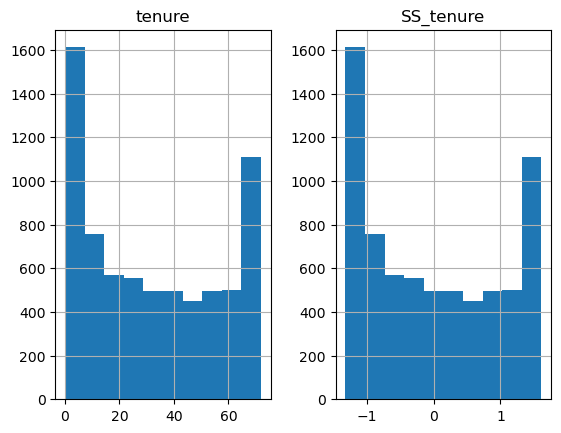

In [20]:
df_filled[['tenure','SS_tenure']].hist()

In [21]:
plt.show()

Another way of plotting

Text(0.5, 1.0, 'Original Data')

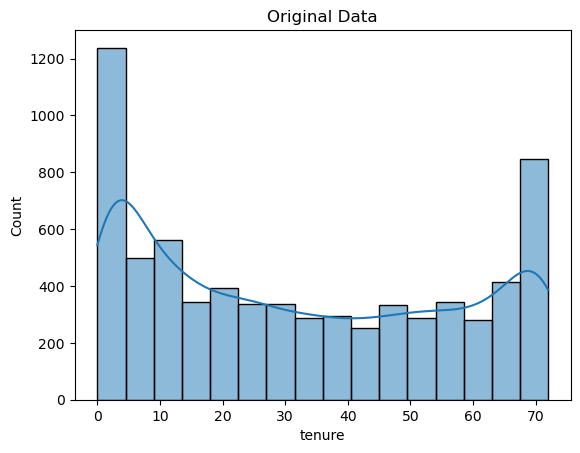

In [22]:
# Original Data
plt.subplot()
sns.histplot(df_filled['tenure'], kde=True)
plt.title('Original Data')

In [23]:
#Standard Scaler Data

Text(0.5, 1.0, 'Standardized Data')

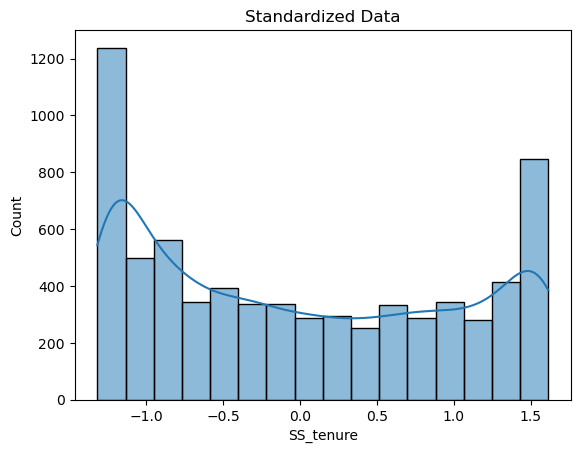

In [24]:
plt.subplot()
sns.histplot(df_filled['SS_tenure'], kde=True)
plt.title('Standardized Data')

##  Split into testing and training datasets

In [25]:
# Import the train_test_split function from the sklearn.model_selection utility.  
from sklearn.model_selection import train_test_split

In [26]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_filled.drop(columns='Total Charges'), 
                                                    df_filled['Total Charges'], test_size=0.3, 
                                                    random_state=47)

In [27]:
X_train.shape, X_test.shape

((4930, 26), (2113, 26))

In [28]:
y_train.shape, y_test.shape

((4930,), (2113,))

In [29]:
#Save the 'gender', 'tenure', and 'Payment method' columns from the train/test data into names_train and names_test
#Then drop those columns from `X_train` and `X_test`. Use 'inplace=True'
names_list = ['gender', 'tenure', 'Payment Method']
names_train = X_train[names_list]
names_test = X_test[names_list]
X_train.drop(columns=names_list, inplace=True)
X_test.drop(columns=names_list, inplace=True)
X_train.shape, X_test.shape

((4930, 23), (2113, 23))

In [30]:
# Check the result
print("Training features:\n", X_train)
print("Testing features:\n", X_test)
print("Training target:\n", y_train)
print("Testing target:\n", y_test)

Training features:
       Senior Citizen Partner Dependents Phone Service Multiple Lines  \
649                1      No         No           Yes             No   
2371               0      No         No           Yes            Yes   
84                 0     Yes         No           Yes             No   
5079               0      No         No           Yes            Yes   
2790               0      No         No           Yes            Yes   
...              ...     ...        ...           ...            ...   
6728               0     Yes         No           Yes            Yes   
3336               0     Yes        Yes           Yes             No   
6471               0     Yes        Yes           Yes             No   
1926               0     Yes        Yes           Yes            Yes   
5255               0      No         No           Yes            Yes   

     Internet Service      Online Security        Online Backup  \
649       Fiber optic                   No      